In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
# Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

0

In [7]:
# Null and Data Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# # Unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# Statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# Exploration
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [11]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [12]:

# explore data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [13]:
# Define numerical and categorical features
df['math score'] = df['math score'].astype("int64")
df['reading score'] = df['reading score'].astype("int64")
df['writing score'] = df['writing score'].astype("int64")

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print
print("{} numerical features: {}".format(len(numeric_features), numeric_features))
print("{} categorical features: {}".format(len(categorical_features), categorical_features))


3 numerical features: ['math score', 'reading score', 'writing score']
5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
# Feature Engineering
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_100score = df[df['reading score'] == 100]['average'].count()
writing_100score = df[df['writing score'] == 100]['average'].count()
math_100score = df[df['math score'] == 100]['average'].count()

print(f"{reading_100score} students scored 100 % in reading")
print(f"{writing_100score} students scored 100 % in writing")
print(f"{math_100score} students scored 100 % in math")

17 students scored 100 % in reading
14 students scored 100 % in writing
7 students scored 100 % in math


In [16]:
reading_20orLess = df[df['reading score'] <= 20]['average'].count()
writing_20orLess = df[df['writing score'] <= 20]['average'].count()
math_20orLess = df[df['math score'] <= 20]['average'].count()

print(f"{reading_20orLess} students scored 20 or less in reading")
print(f"{writing_20orLess} students scored 20 or less in writing")
print(f"{math_20orLess} students scored 20 or less in math")

1 students scored 20 or less in reading
3 students scored 20 or less in writing
4 students scored 20 or less in math


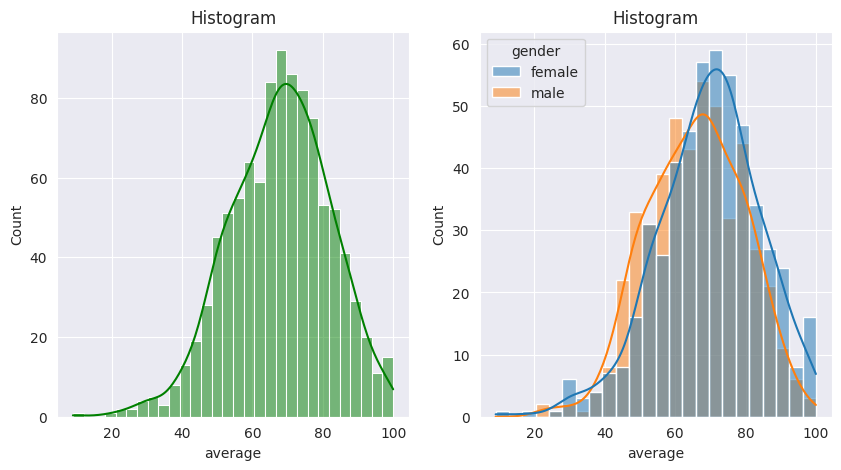

In [17]:
#Visualization
# Avg score distribution
# 1. Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title("Histogram")
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title("Histogram")
plt.show()

<Axes: xlabel='total score', ylabel='Count'>

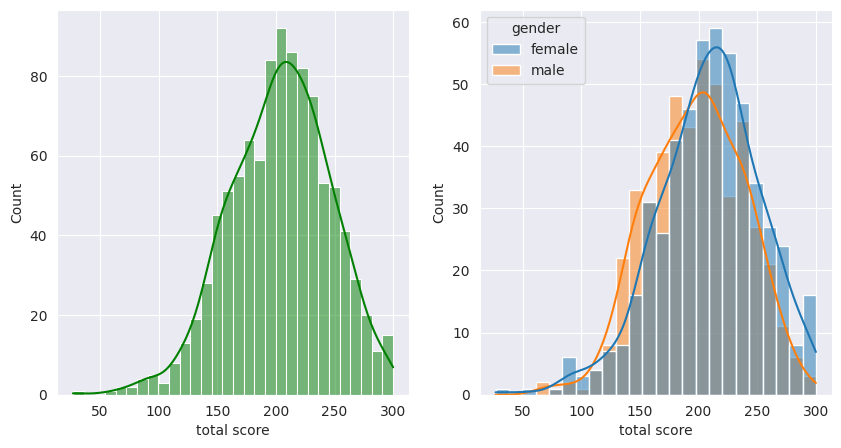

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')

Text(0.5, 1.0, 'Male & Lunch type')

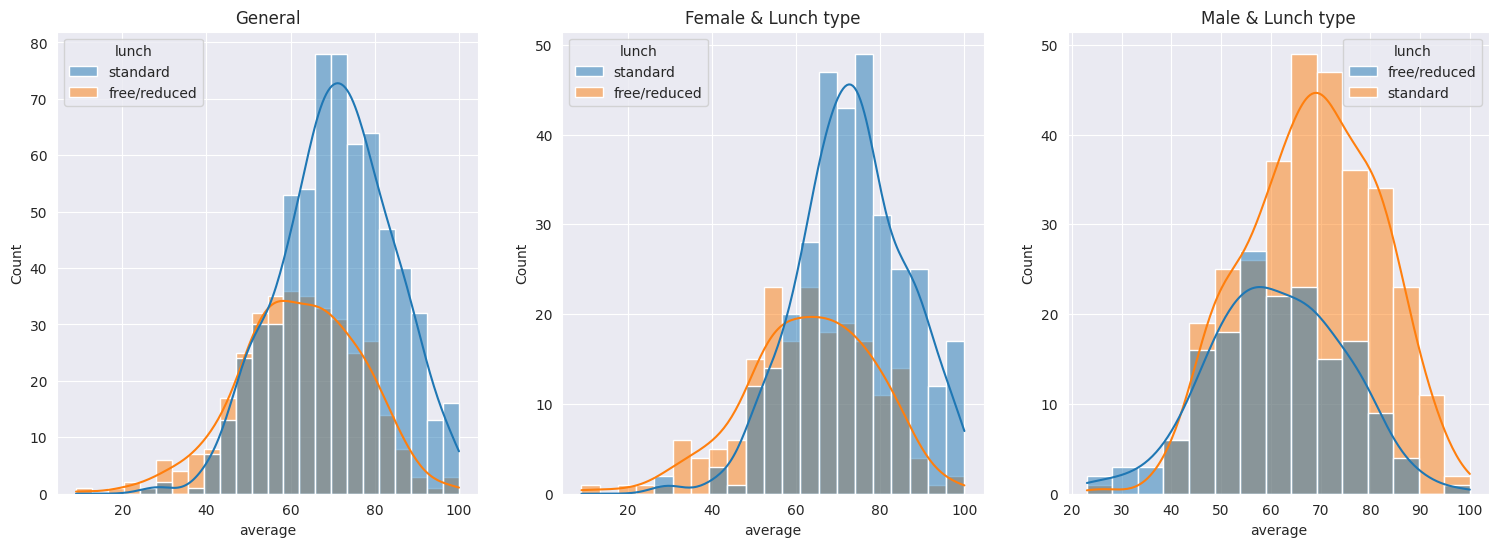

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("General")
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title("Female & Lunch type")
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title("Male & Lunch type")

### Insights
- Both males and females are more likely to perform well on exams when they consume a standard lunch.

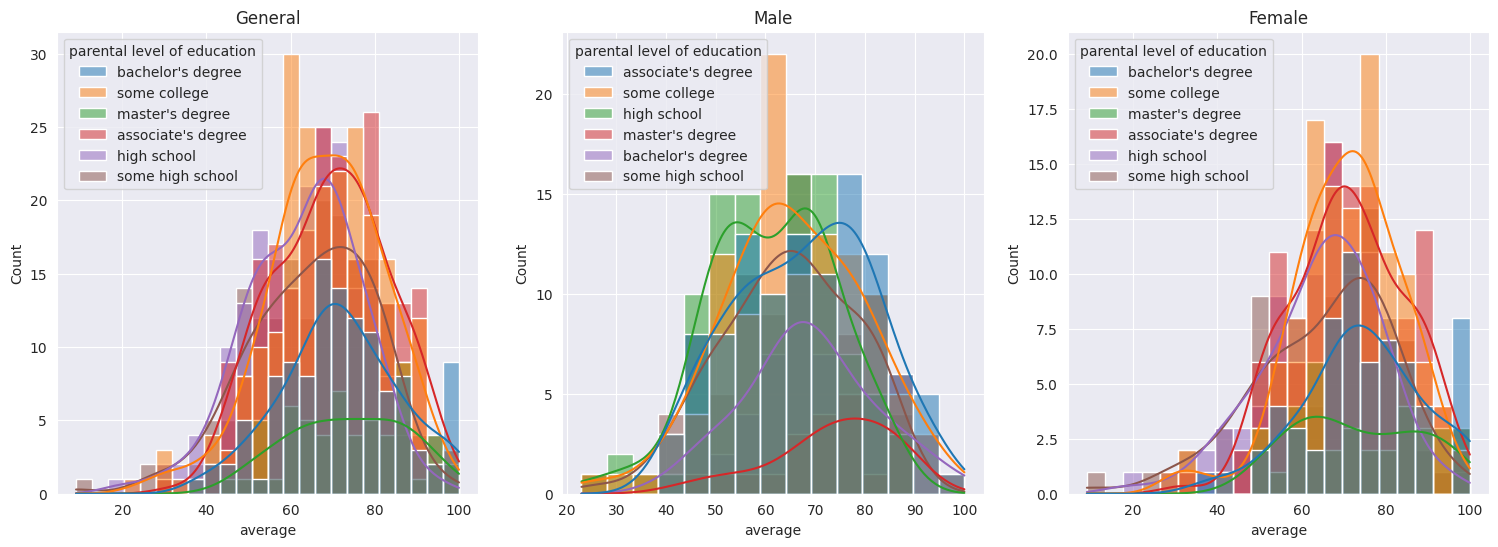

In [23]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde='True', hue="parental level of education")
plt.title("General")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde='True', hue="parental level of education")
plt.title("Male")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde='True', hue="parental level of education")
plt.title("Female")
plt.show()


## Insights
- Overall, parents' education does not appear to have a significant impact on student performance in exams.
- However, the second plot suggests that male students whose parents have an associate's or master's degree tend to perform better in exams.
- On the other hand, the third plot indicates that there is no apparent effect of parents' education on female students' academic performance.

Text(0.5, 1.0, 'Female')

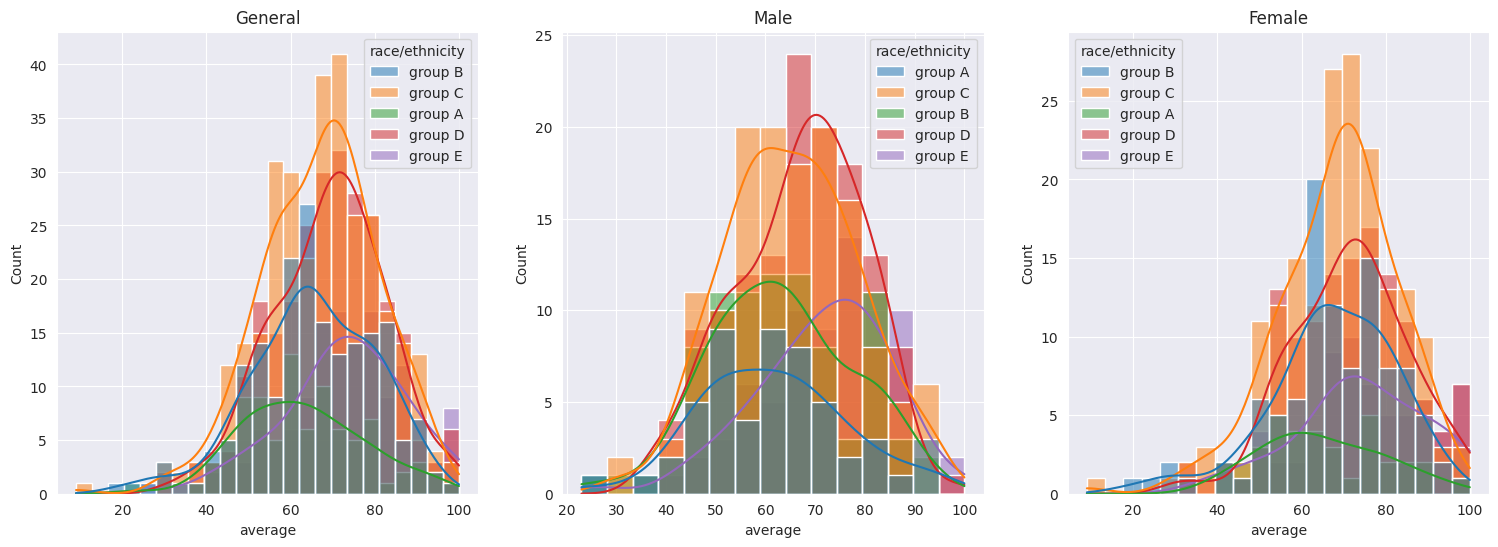

In [25]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue="race/ethnicity")
plt.title("General")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue="race/ethnicity")
plt.title("Male")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue="race/ethnicity")
plt.title("Female")

## Insights
- Both Group A and Group B students tend to perform poorly in exams.
- Furthermore, this trend seems to hold true regardless of whether the student is male or female.

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing score'>

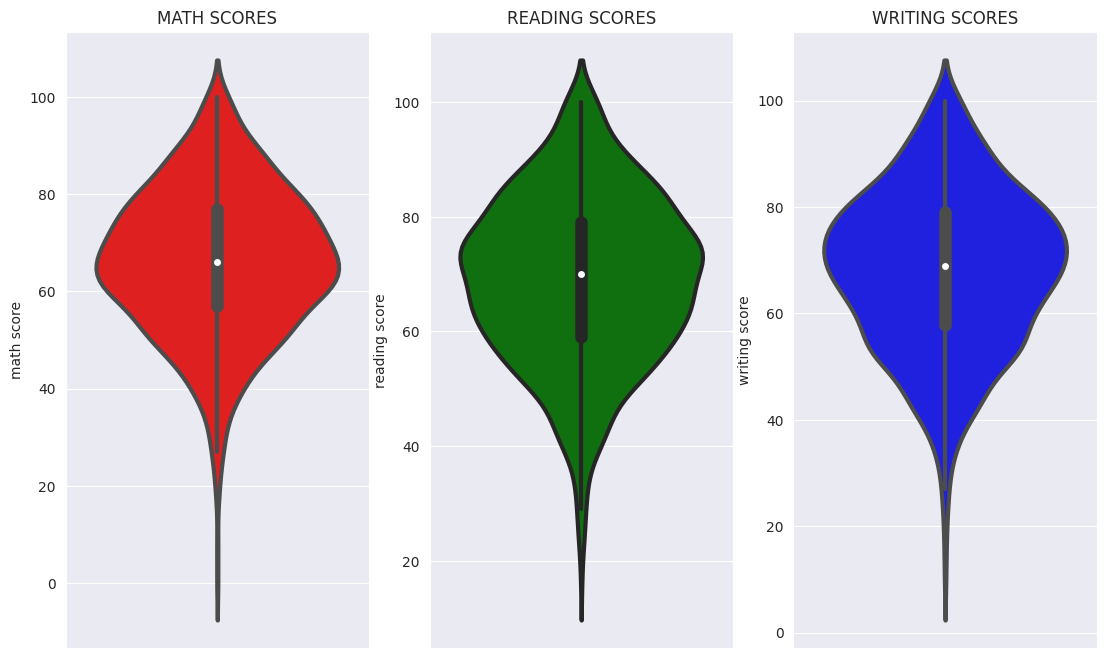

In [29]:
# Maximum score of  students in all three subjects
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title("READING SCORES")
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title("WRITING SCORES")
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

### Insights
- The data from the three plots suggests that the majority of students score between 60-80 in Maths.
- On the other hand, for reading and writing, most students score between 50-80.

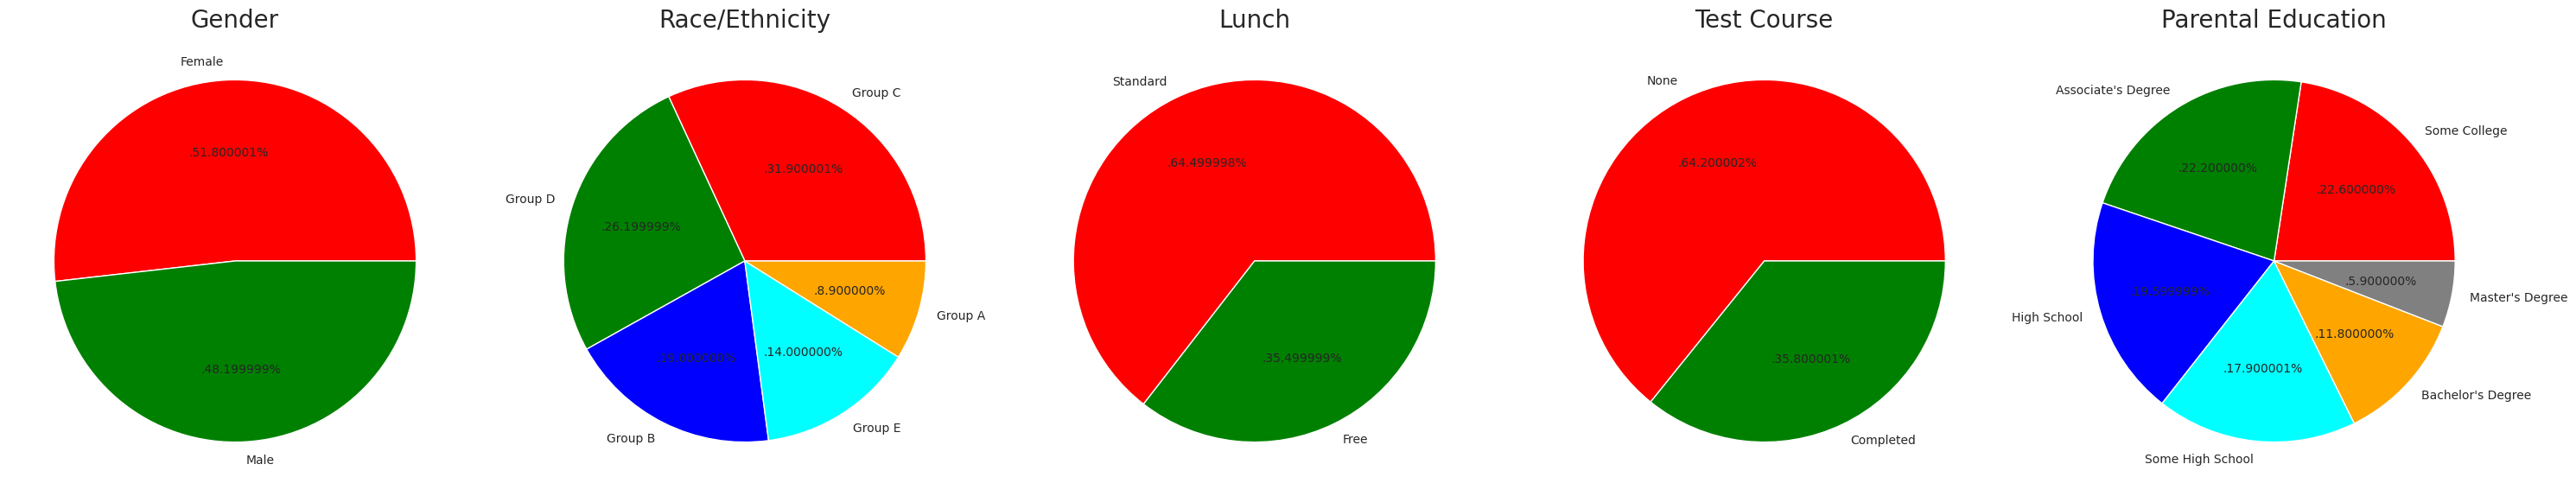

In [36]:
# Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

#### Insights
- The data shows that the number of male and female students is almost equal.
- Additionally, the highest number of students belongs to Group C.
- The number of students who have standard lunch is greater than those who have free/reduced lunch.
- The majority of students have not enrolled in any test preparation course.
- The number of students whose parental education is "Some College" is the greatest, followed closely by those whose parents have an "Associate's Degree".

# Featurewise Visualization

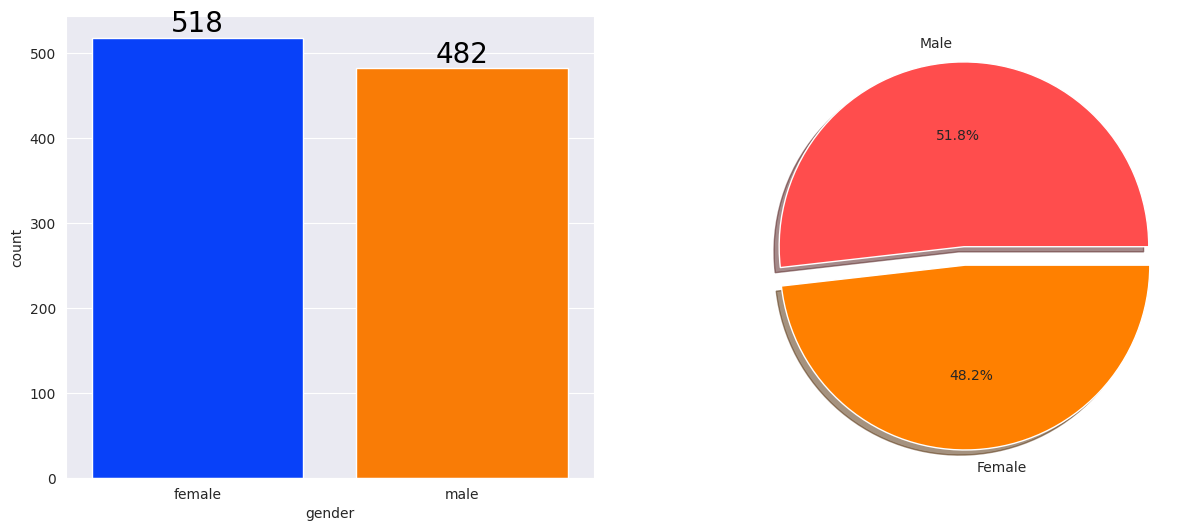

In [42]:
# 1. Gender distribution - Univariate
f, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
- The gender data in the dataset is balanced.
- Specifically, the number of female students is 518, accounting for 48% of the total students, and the number of male students is 482, accounting for 52% of the total students.

In [43]:
# Bivariate
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


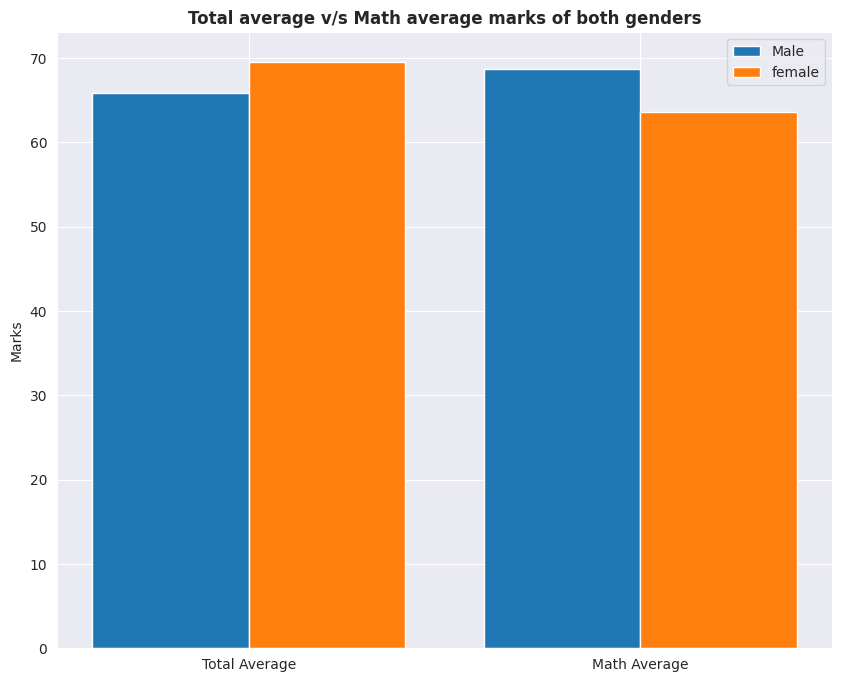

In [45]:
plt.figure(figsize=(10, 8))
X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


#### Insights
- On average, female students have a better overall score than male students.
- However, male students tend to score higher in Maths compared to female students.

RACE/ETHNICITY

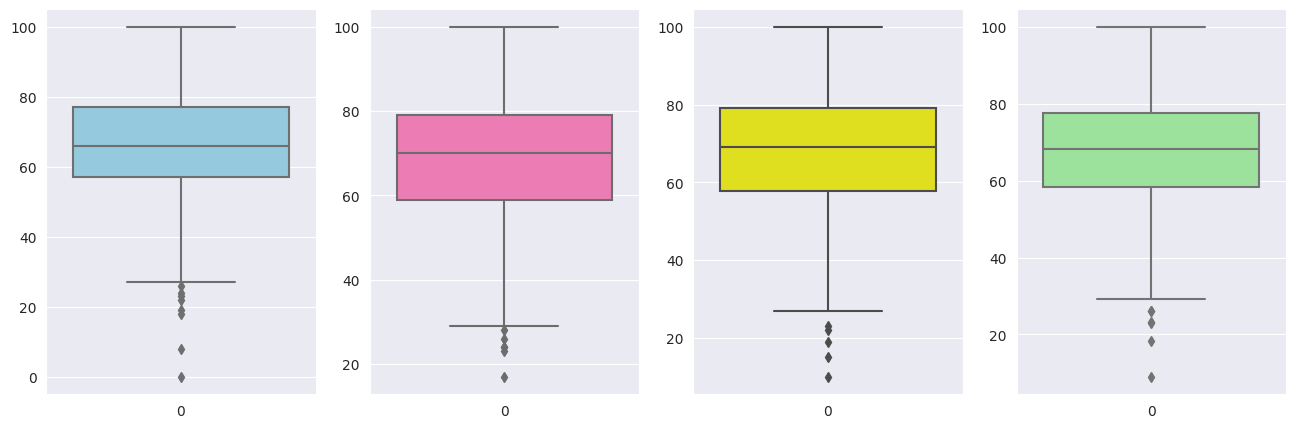

In [46]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()